In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
-

In [ ]:
dataset_df = pd.read_csv(dataset_dir + "covid19_sera_merged.csv")
dataset_df.head()

,maestro_column_unmod,maestro_column_variant,patient_id,label,y_covid,y_severe_type,Patient ID a,Metabolomics ID e,Metabolites,(14 or 15)-methylpalmitate (a17:0 or i17:0),...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
0,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,HC1,Healthy,1,0,HC1,jkdz1,jkdz1,7439425.0,...,0.0,1.958825,0.00000,0.000000,1.174198,0.0,0.0,0.0,0.370040,0.0
1,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,HC10,Healthy,1,0,HC10,jkdz10,jkdz10,16636076.0,...,0.0,2.544654,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,HC12,Healthy,1,0,HC12,jkdz12,jkdz12,9140857.0,...,0.0,0.913199,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,HC13,Healthy,1,0,HC13,jkdz13,jkdz13,7863659.5,...,0.0,1.035449,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,HC17,Healthy,1,0,HC17,jkdz17,jkdz17,7996507.5,...,0.0,0.110892,0.81455,0.863862,0.000000,0.0,0.0,0.0,0.791905,0.0


In [ ]:
dataset_df = dataset_df.fillna(0)

## Split train/validation/test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, test_df = train_test_split(dataset_df, test_size=0.3, random_state=12345)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=54321)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(58, 203872)
(12, 203872)
(13, 203872)


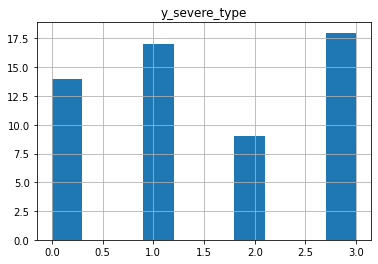

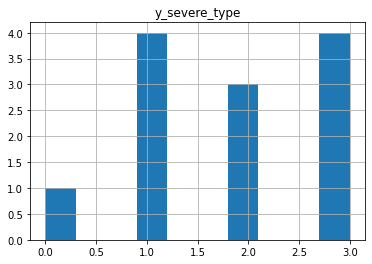

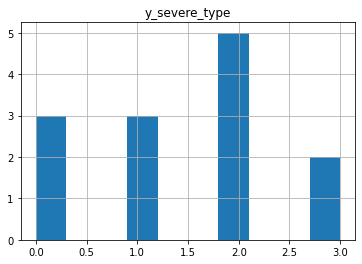

In [ ]:
train_df[["y_severe_type"]].hist()
val_df[["y_severe_type"]].hist()
test_df[["y_severe_type"]].hist()
plt.show()

## Random forest and Gradient Boosting experiments

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score

In [ ]:
def get_variant_features(df):
    return df.iloc[:, 102411:]

In [ ]:
variant_train = get_variant_features(train_df)
variant_val = get_variant_features(val_df)
variant_test = get_variant_features(test_df)

In [ ]:
variant_train.head()

,variant_ccms_row_1,variant_ccms_row_2,variant_ccms_row_3,variant_ccms_row_4,variant_ccms_row_5,variant_ccms_row_6,variant_ccms_row_7,variant_ccms_row_8,variant_ccms_row_9,variant_ccms_row_10,...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
25,0.0,0.0,0.125162,0.523169,0.118659,0.623897,0.0,0.0,0.0,0.000000,...,0.00000,0.000000,0.321736,0.0,0.000000,0.000000,0.000000,0.000000,0.524086,0.0
70,0.0,0.0,1.210748,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.181003,...,0.00000,0.307777,0.000000,0.0,0.549982,0.000000,0.000000,0.000000,0.232562,0.0
28,0.0,0.0,0.757112,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.299246,...,0.00000,1.489917,0.000000,0.0,0.789613,0.000000,0.000000,0.000000,0.156169,0.0
18,0.0,0.0,0.743318,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.278907,...,0.00000,1.182886,0.000000,0.0,0.589243,0.000000,0.000000,0.000000,0.163054,0.0
9,0.0,0.0,0.030790,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,1.52507,0.143092,0.000000,0.0,0.000000,1.488615,1.349938,1.324341,0.000000,0.0


In [ ]:
n_experiments = 10

In [ ]:
models = []

accs = []
pres = []

for i in range(n_experiments):
    print("Running experiment", i)
    rf_model = RandomForestClassifier(n_estimators=200, random_state=i)
    gb_model = GradientBoostingClassifier(n_estimators=200, random_state=i)
    lg_model = LGBMClassifier(n_estimators=200, random_state=i)

    acs = []
    prs = []
    for model in [rf_model, gb_model, lg_model]:
        labels = train_df["y_covid"]
        model.fit(variant_train, labels)
        train_preds = model.predict(variant_train)
        val_preds = model.predict(variant_val)
        test_preds = model.predict(variant_test)

        acs.append((accuracy_score(labels, train_preds),
                     accuracy_score(val_df["y_covid"], val_preds),
                     accuracy_score(test_df["y_covid"], test_preds)))
        prs.append((precision_score(labels, train_preds),
                     precision_score(val_df["y_covid"], val_preds),
                     precision_score(test_df["y_covid"], test_preds)))
        models.append((rf_model, gb_model, lg_model))
        accs.append(acs)
        pres.append(prs)

Running experiment 0
Running experiment 1
Running experiment 2
Running experiment 3
Running experiment 4
Running experiment 5
Running experiment 6
Running experiment 7
Running experiment 8
Running experiment 9


In [ ]:
acc_avg = np.average(np.array(accs), axis=0)
acc_avg

array([[1.        , 0.66666667, 0.8       ],
       [1.        , 0.75      , 0.92307692],
       [1.        , 0.75      , 1.        ]])

In [ ]:
pre_avg = np.average(np.array(pres), axis=0)
pre_avg

array([[1.        , 0.66666667, 0.83822844],
       [1.        , 0.77777778, 1.        ],
       [1.        , 0.72727273, 1.        ]])

In [ ]:
pres

[[(1.0, 0.6666666666666666, 0.8461538461538461),
  (1.0, 0.7777777777777778, 1.0),
  (1.0, 0.7272727272727273, 1.0)],
 [(1.0, 0.6666666666666666, 0.8461538461538461),
  (1.0, 0.7777777777777778, 1.0),
  (1.0, 0.7272727272727273, 1.0)],
 [(1.0, 0.6666666666666666, 0.8461538461538461),
  (1.0, 0.7777777777777778, 1.0),
  (1.0, 0.7272727272727273, 1.0)],
 [(1.0, 0.6666666666666666, 0.8461538461538461),
  (1.0, 0.7777777777777778, 1.0),
  (1.0, 0.7272727272727273, 1.0)],
 [(1.0, 0.6666666666666666, 0.8461538461538461),
  (1.0, 0.7777777777777778, 1.0),
  (1.0, 0.7272727272727273, 1.0)],
 [(1.0, 0.6666666666666666, 0.8461538461538461),
  (1.0, 0.7777777777777778, 1.0),
  (1.0, 0.7272727272727273, 1.0)],
 [(1.0, 0.6666666666666666, 0.8461538461538461),
  (1.0, 0.7777777777777778, 1.0),
  (1.0, 0.7272727272727273, 1.0)],
 [(1.0, 0.6666666666666666, 0.8461538461538461),
  (1.0, 0.7777777777777778, 1.0),
  (1.0, 0.7272727272727273, 1.0)],
 [(1.0, 0.6666666666666666, 0.8461538461538461),
  (1.0,

In [ ]:
sum(models[0][1].feature_importances_ != 0)

73

In [ ]:
for i in range(n_experiments):
    print(sum(models[i][2].feature_importances_ != 0))

28
28
28
28
28
28
28
28
28
28


In [ ]:
idxs = []
for i in range(n_experiments):
    for j,x in enumerate(models[i][2].feature_importances_):
        if x != 0:
            idxs.append((j, x))
idxs = set(idxs)
print(len(idxs))
idxs = sorted(idxs, key=lambda x: x[1], reverse=True)
idxs

28


[(73516, 21),
 (57363, 17),
 (42796, 15),
 (74824, 15),
 (57427, 15),
 (100649, 13),
 (81198, 13),
 (68804, 11),
 (91579, 11),
 (57515, 10),
 (19619, 9),
 (44578, 7),
 (19270, 7),
 (74755, 6),
 (20512, 5),
 (56123, 4),
 (56396, 3),
 (15616, 3),
 (69575, 3),
 (57223, 2),
 (65518, 2),
 (37261, 2),
 (57517, 1),
 (19408, 1),
 (70220, 1),
 (85301, 1),
 (68027, 1),
 (67570, 1)]

In [ ]:
idxs = np.array(idxs)
idxs

array([[ 73516,     21],
       [ 57363,     17],
       [ 42796,     15],
       [ 74824,     15],
       [ 57427,     15],
       [100649,     13],
       [ 81198,     13],
       [ 68804,     11],
       [ 91579,     11],
       [ 57515,     10],
       [ 19619,      9],
       [ 44578,      7],
       [ 19270,      7],
       [ 74755,      6],
       [ 20512,      5],
       [ 56123,      4],
       [ 56396,      3],
       [ 15616,      3],
       [ 69575,      3],
       [ 57223,      2],
       [ 65518,      2],
       [ 37261,      2],
       [ 57517,      1],
       [ 19408,      1],
       [ 70220,      1],
       [ 85301,      1],
       [ 68027,      1],
       [ 67570,      1]])

In [ ]:
important_df = dataset_df[["maestro_column_variant", "patient_id", "y_covid"] + list(variant_train.columns[idxs[:, 0]])]
important_df

,maestro_column_variant,patient_id,y_covid,variant_ccms_row_73517,variant_ccms_row_57364,variant_ccms_row_42797,variant_ccms_row_74825,variant_ccms_row_57428,variant_ccms_row_100650,variant_ccms_row_81199,...,variant_ccms_row_69576,variant_ccms_row_57224,variant_ccms_row_65519,variant_ccms_row_37262,variant_ccms_row_57518,variant_ccms_row_19409,variant_ccms_row_70221,variant_ccms_row_85302,variant_ccms_row_68028,variant_ccms_row_67571
0,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,HC1,1,0.638102,0.594220,2.287542,11.851476,4.094602,0.000000,0.000000,...,0.098811,0.250096,3.457948,0.128708,0.000000,0.779253,0.226583,0.265288,0.634103,0.480313
1,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,HC10,1,1.380685,1.004231,3.168297,9.650905,14.472782,0.363970,3.169787,...,0.096555,0.313441,0.000000,0.539243,0.263105,0.000000,0.238092,0.046747,0.396186,0.810238
2,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,HC12,1,0.071696,5.128071,0.274528,2.124396,1.093508,0.156005,1.269073,...,0.062409,0.126498,0.000000,0.658676,0.152823,0.000000,0.198969,0.020082,3.591274,0.131683
3,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,HC13,1,0.135240,0.397327,0.353590,9.426140,3.938592,0.097273,0.627630,...,0.045422,0.112935,0.000000,0.190743,0.000000,0.000000,0.162186,0.018793,0.099972,0.093906
4,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,HC17,1,0.780187,0.434968,0.627867,23.380932,8.654196,0.919481,0.742804,...,0.361553,1.084437,5.981628,0.179276,0.437705,0.758655,0.810881,0.132831,0.102187,0.416815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,_dyn_#Symptomatic-non-COVID-19.JBDZ5.Symptomat...,JBDZ5,0,0.065978,0.518904,0.171700,0.818074,0.941468,0.147865,0.257547,...,0.052069,0.373615,0.490240,0.221863,0.000000,0.549449,0.496097,0.067258,0.622366,0.214844
79,_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomat...,JBDZ6,0,0.085513,0.526770,0.079235,0.623599,0.656439,0.057987,0.087225,...,0.010388,0.370034,0.299206,2.104091,0.298538,1.438371,0.426034,0.068594,0.131856,0.169740
80,_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomat...,JBDZ7,0,0.172897,0.739473,0.748578,0.649596,0.941099,0.073564,0.125294,...,0.006960,0.424426,0.000000,0.233197,0.246262,2.425026,0.211883,0.306544,0.502619,0.173774
81,_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomat...,JBDZ8,0,0.150494,0.848246,0.385558,0.526410,4.800303,0.162438,0.182562,...,0.011401,0.657849,0.000000,0.134364,0.219024,1.408806,0.285092,0.424315,0.570794,0.189584


In [ ]:
important_df.to_csv(dataset_dir + "important_variant_peptides.tsv", sep="\t", index=False)